In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [2]:
# Load Data
X_train = np.load('data\X.npy')
y_train = np.load('data\y.npy')

In [3]:
print(f"The shape of X is: {X_train.shape}")
print(f"The shape of y is: {y_train.shape}")


The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


In [4]:
# Split the date into 3 sets: Training, Cross-Validation, and Test sets
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_cv, y_cv, test_size=0.4, random_state=42)

# display tyhe dimensions of the different sets
print(f"The shape of the traning set is: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"The shape of the cross validation set is: X_cv = {X_cv.shape}, y_cv = {y_cv.shape}")
print(f"The shape of the test set is: X_test = {X_test.shape}, y_test = {y_test.shape}")


The shape of the traning set is: X_train = (3500, 400), y_train = (3500, 1)
The shape of the cross validation set is: X_cv = (900, 400), y_cv = (900, 1)
The shape of the test set is: X_test = (600, 400), y_test = (600, 1)


In [5]:
# Display the 1st five examples
print(X_train[:5])
print(y_train[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[3]
 [4]
 [8]
 [2]
 [4]]


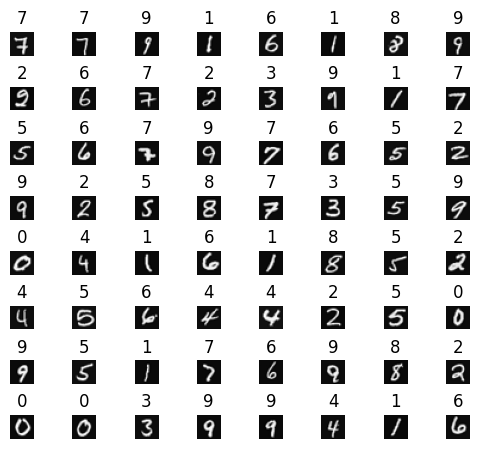

In [6]:
m, n = X_train.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    # Select random example
    rand_index = np.random.randint(m)   

    # Select the ro corresponding to the index generated, and reshape it
    X_random = X_train[rand_index].reshape(20, 20).T

    ax.imshow(X_random, cmap='gray')

    # Display label above the image
    ax.set_title(y_train[rand_index, 0])
    ax.set_axis_off()

In [7]:
# Building the neural network

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')

    ], name = "my_model"
)

In [8]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training phase
learning_rates = [0.0001, 0.001, 0.003, 0.006, 0.01, 0.03, 0.07, 0.1]
J_history  = []

for lr in learning_rates:
    model.compile(
        loss= SparseCategoricalCrossentropy(from_logits=True),
        optimizer = Adam(learning_rate=lr),
    )

    history = model.fit(
        X_train, y_train,
        epochs = 54
    )

    J_history.append(history.history)

print(J_history)

Epoch 1/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3057  
Epoch 2/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1905  
Epoch 3/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0748  
Epoch 4/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9285  
Epoch 5/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7782  
Epoch 6/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6339  
Epoch 7/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4986  
Epoch 8/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3722  
Epoch 9/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2539  
Epoch 10/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 1.1450
Epoch 11/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.0466
Epoch 12/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.9597
Epoch 13/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.8844
Epoch 14/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.8198
Epoch 15/54
110/110 ━━━━━━━━━

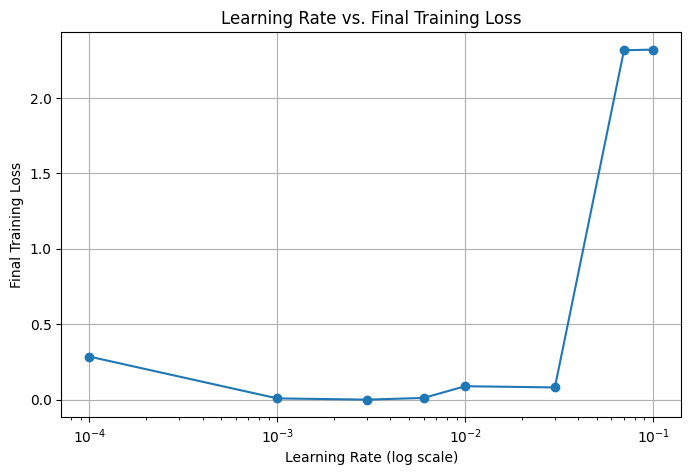

In [10]:


final_losses = [h['loss'][-1] for h in J_history]

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, final_losses, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Final Training Loss")
plt.title("Learning Rate vs. Final Training Loss")
plt.grid(True)
plt.show()


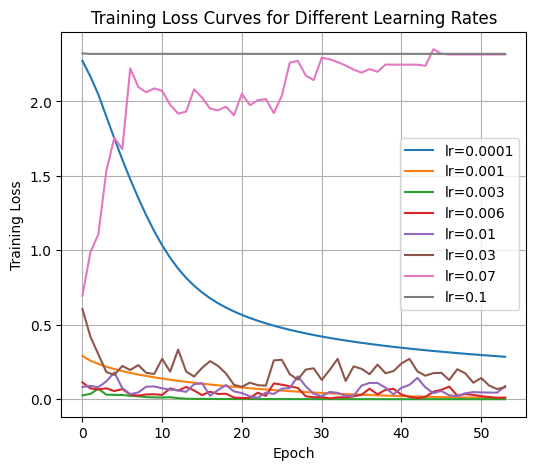

In [11]:
# Plot training loss values
plt.figure(figsize=(6, 5))

for i, lr in enumerate(learning_rates):
    loss = J_history[i]['loss']  # or 'val_loss' if you used validation_split
    plt.plot(loss, label=f"lr={lr}")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curves for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Now lets use the optimal value of the learning rate in order to construct the optimal model

model_up = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')

    ], name="model_up"
)

model_up.compile(
        loss= SparseCategoricalCrossentropy(from_logits=True),
        optimizer = Adam(learning_rate=0.001),
    )

history_up = model_up.fit(
    X_train, y_train,
    epochs = 54
)



Epoch 1/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 1.9797
Epoch 2/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.9665
Epoch 3/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.5812
Epoch 4/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4379  
Epoch 5/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3626  
Epoch 6/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.3128
Epoch 7/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.2772
Epoch 8/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.2492
Epoch 9/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2261  
Epoch 10/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.2075
Epoch 11/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.1912
Epoch 12/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.1776
Epoch 13/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.1652
Epoch 14/54
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1544  
Epoch 15/54
110/110 ━━━━━━━━━

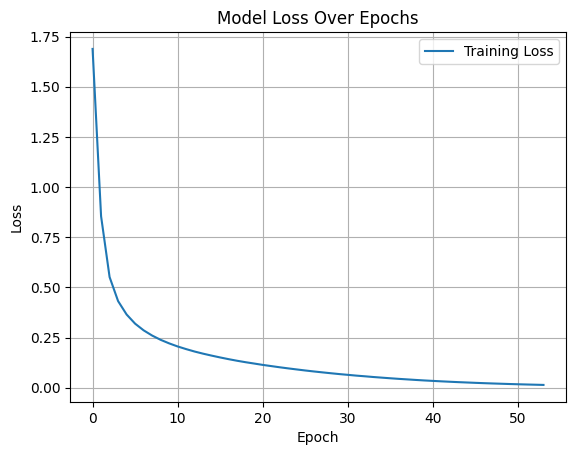

In [13]:
# Plot training loss values
plt.plot(history_up.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Predicting on the training and the cross validation sets
logits_train = model_up.predict(X_train)
logits_cv = model_up.predict(X_cv)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


In [15]:
# Converting logits to probabilities
train_pred = tf.nn.softmax(logits_train).numpy()
cv_pred = tf.nn.softmax(logits_cv).numpy()

print(train_pred.shape)

y_train_pred = np.argmax(train_pred, axis=1)
y_cv_pred = np.argmax(cv_pred, axis=1)

print(y_cv_pred.shape)



(3500, 10)
(900,)


In [21]:
train_classification_error = np.mean(y_train.flatten() != y_train_pred)
cv_classification_error = np.mean(y_cv.flatten() != y_cv_pred)
print(f"Training Classification Error: {train_classification_error:.4f}")
print(f"Validation Classification Error: {cv_classification_error:.4f}")

print(f"The accuracy of the training set: {accuracy_score(y_train, y_train_pred)}")
print(f"The accuracy of the validation set: {accuracy_score(y_cv, y_cv_pred)}")


Training Classification Error: 0.0009
Validation Classification Error: 0.0789
The accuracy of the training set: 0.9991428571428571
The accuracy of the validation set: 0.9211111111111111


In [22]:
# 1. Check your data
print("Label distribution:", np.unique(y_train, return_counts=True))
print("Input shape:", X_train.shape)
print("Label range:", y_train.min(), "to", y_train.max())

# 2. Check model predictions
print("Raw logits range:", logits_train.min(), "to", logits_train.max())
print("Prediction distribution:", np.unique(y_train_pred, return_counts=True))

# 3. Check if model is predicting same class for everything
print("Unique predictions:", len(np.unique(y_train_pred)))

Label distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([336, 348, 345, 346, 357, 359, 357, 342, 368, 342]))
Input shape: (3500, 400)
Label range: 0 to 9
Raw logits range: -57.26789 to 31.982897
Prediction distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([336, 348, 345, 343, 357, 360, 357, 344, 368, 342]))
Unique predictions: 10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

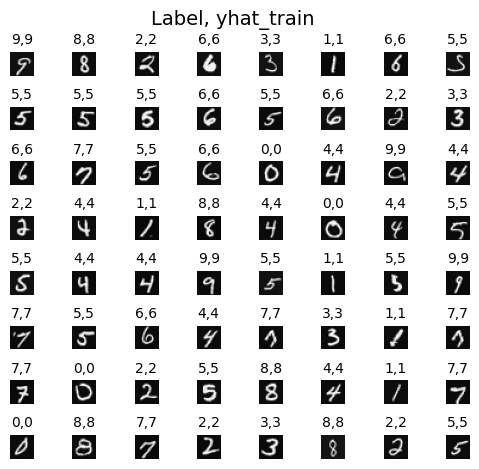

In [23]:
m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model_up.predict(X_train[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat_train", fontsize=14)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

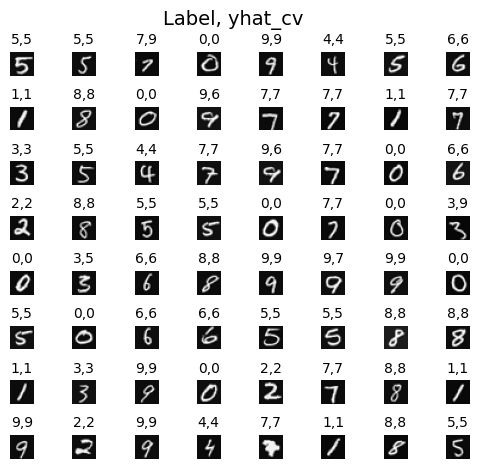

In [25]:
m, n = X_cv.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random = X_cv[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model_up.predict(X_cv[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat_cv = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_cv[random_index,0]},{yhat_cv}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat_cv", fontsize=14)
plt.show()